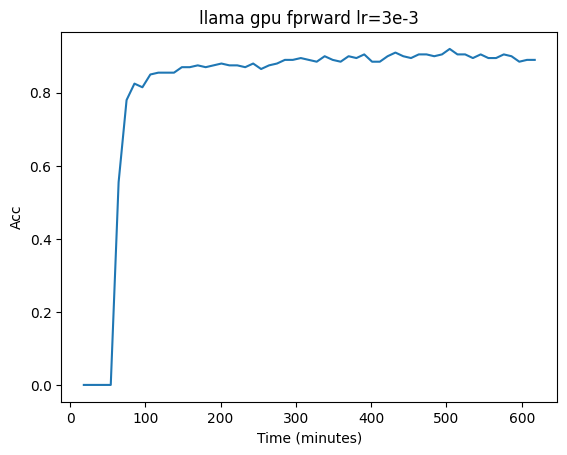

In [4]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

# 读取log文件
with open('log_to_draw.log', 'r') as f:
    lines = f.readlines()

# 定义横坐标和纵坐标列表
x = []
y = []

start_time = None
# 处理每一行
for line in lines:
    if start_time == None:
        start_time = datetime.strptime(line[11:19], '%H:%M:%S')

    # 如果当前行包含acc和时间字符串
    if "acc" in line:
        # 获取acc值和时间字符串
        acc_value = float(line[line.rfind("acc")+5:])
        time_str = line[11:19]
        # 将时间字符串转换为datetime对象
        time = datetime.strptime(time_str, '%H:%M:%S')

        # 计算当前时间和起始时间之间的时间差，作为横坐标
        x.append((time - start_time).total_seconds() / 60)
        # 将acc值作为纵坐标
        y.append(acc_value)

# 画折线图
plt.plot(x, y)
plt.xlabel('Time (minutes)')
plt.ylabel('Acc')
plt.title("llama gpu fprward lr=3e-3")
plt.show()

[0.0, 63.2, 126.4, 189.60000000000002, 252.8, 316.0, 379.20000000000005, 442.40000000000003, 505.6, 568.8000000000001, 632.0, 695.2, 758.4000000000001, 821.6, 884.8000000000001, 948.0, 1011.2, 1074.4, 1137.6000000000001, 1200.8, 1264.0, 1327.2, 1390.4, 1453.6000000000001, 1516.8000000000002, 1580.0, 1643.2, 1706.4, 1769.6000000000001, 1832.8000000000002, 1896.0, 1959.2, 2022.4, 2085.6, 2148.8, 2212.0, 2275.2000000000003, 2338.4, 2401.6, 2464.8, 2528.0, 2591.2000000000003, 2654.4, 2717.6, 2780.8, 2844.0, 2907.2000000000003, 2970.4, 3033.6000000000004, 3096.8, 3160.0, 3223.2000000000003, 3286.4, 3349.6000000000004, 3412.8, 3476.0, 3539.2000000000003, 3602.4]
[0, 0, 0, 0, 0.555, 0.78, 0.825, 0.825, 0.85, 0.855, 0.855, 0.855, 0.87, 0.87, 0.875, 0.875, 0.875, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.895, 0.895, 0.895, 0.9, 0.9, 0.9, 0.9, 0.9, 0.905, 0.905, 0.905, 0.905, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92,

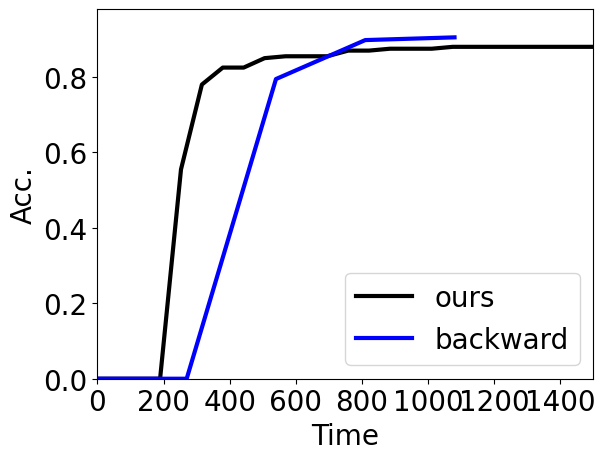

In [4]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np
def forward_round_to_time(round_num):
    res = []
    train_time = 0.74*2
    comm_time = 4.2*4/10
    round_time = (train_time+comm_time)*20
    for i in range(round_num):
        res.append(i*(round_time))
    return res
acc = [0]
with open("log_to_draw.log",'r') as f:
    lines = f.readlines()
    cur_max = 0
    for line in lines:
        if 'acc' in line:
            cur_acc = float(line[line.rfind(":")+1:])
            if cur_acc>cur_max:
                cur_max = cur_acc
            acc.append(cur_max)
    print(forward_round_to_time(len(acc)))
    print(acc)
    plt.plot(forward_round_to_time(len(acc)), acc, color='k',label='ours',linewidth=3)

backward_acc = [0,0,0.7946052631578947, 0.8978947368421053, 0.9051315789473684]
backward_time = [i*(2.16*125) for i in range(len(backward_acc))]
plt.plot(backward_time,backward_acc,color='b',label='backward',linewidth=3)    
print(backward_time)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,1500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=20)
# plt.savefig("/data/wyz/ForwardFL-Latex/figs/eval-llama-agnews.pdf", bbox_inches="tight")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.36, 0.628, 0.746, 0.794, 0.84, 0.855, 0.86, 0.869, 0.869, 0.877, 0.879, 0.882, 0.884, 0.886, 0.889, 0.889, 0.889, 0.889, 0.893, 0.894, 0.894, 0.894, 0.894, 0.9, 0.9, 0.9, 0.9, 0.9, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.904, 0.905, 0.905, 0.905, 0.905, 0.905, 0.906, 0.906, 0.907, 0.907, 0.907, 0.907, 0.907]


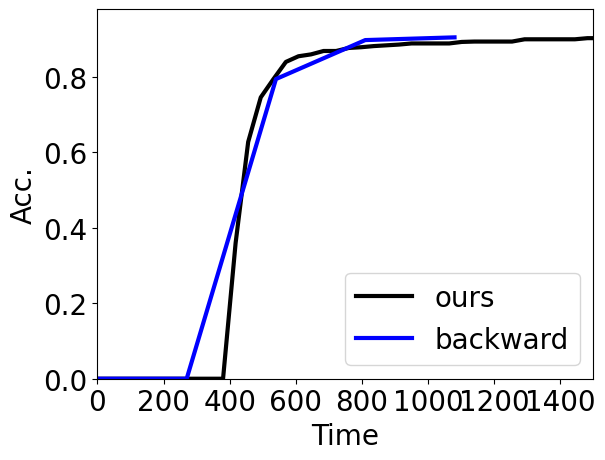

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np
def forward_round_to_time(round_num):
    res = []
    train_time = 0.74*2
    comm_time = 4.2/10
    round_time = (train_time+comm_time)*20
    for i in range(round_num):
        res.append(i*(round_time))
    return res
acc = [0]
with open("train_loss_v100_3e-4.log",'r') as f:
    lines = f.readlines()
    cur_max = 0
    for line in lines:
        if 'acc' in line:
            cur_acc = float(line[line.rfind(":")+1:])
            if cur_acc>cur_max:
                cur_max = cur_acc
            acc.append(cur_max)
    print(acc)
    plt.plot(forward_round_to_time(len(acc)), acc, color='k',label='ours',linewidth=3)

backward_acc = [0,0,0.7946052631578947, 0.8978947368421053, 0.9051315789473684]
backward_time = [i*(2.16*125) for i in range(len(backward_acc))]
plt.plot(backward_time,backward_acc,color='b',label='backward',linewidth=3)    

plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,1500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=20)